In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import math 
import random 
import names 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:\\Users\\Kush\\Board Infinity\\Machine Learning Projects\\AutoData.csv")
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
CompanyName = df['make'].apply(lambda x : x.split(' ')[0])
df.insert(3,"Company",CompanyName)
df.drop(['make'],axis=1,inplace=True)
df.head()

,symboling,fueltype,Company,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
df.Company = df.Company.str.lower()

def replace_name(a,b):
    df.Company.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [8]:
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [10]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [11]:
df.isnull().sum()

symboling           0
fueltype            0
Company             0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


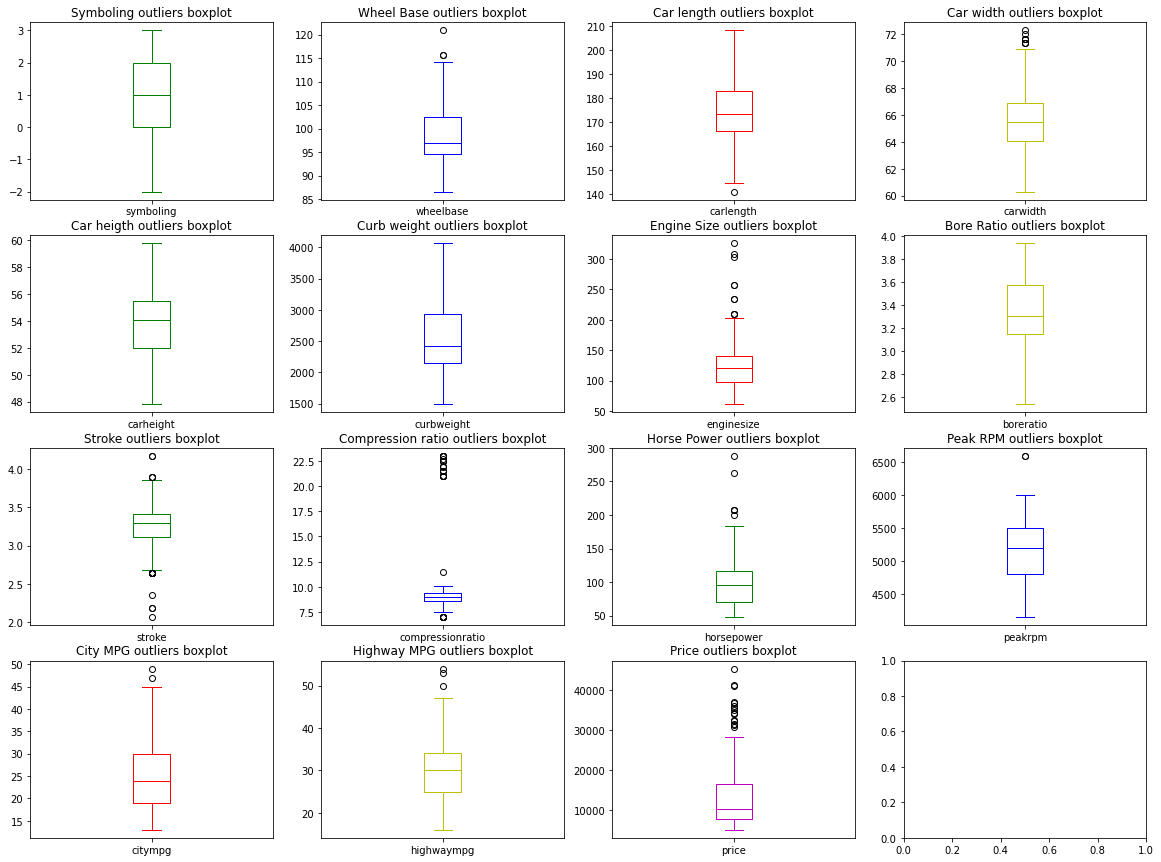

In [14]:
fig, ax = plt.subplots(nrows = 4 , ncols = 4, figsize = (20,15))

df['symboling'].plot(kind = "box" , color = "g", ax = ax[0,0])
ax[0,0].set_title("Symboling outliers boxplot")

df['wheelbase'].plot(kind = "box" , color = "b", ax = ax[0,1])
ax[0,1].set_title("Wheel Base outliers boxplot")

df['carlength'].plot(kind = "box" , color = "r", ax = ax[0,2])
ax[0,2].set_title("Car length outliers boxplot")

df['carwidth'].plot(kind = "box" , color = "y", ax = ax[0,3])
ax[0,3].set_title("Car width outliers boxplot")

df['carheight'].plot(kind = "box" , color = "g", ax = ax[1,0])
ax[1,0].set_title("Car heigth outliers boxplot")

df['curbweight'].plot(kind = "box" , color = "b", ax = ax[1,1])
ax[1,1].set_title("Curb weight outliers boxplot")

df['enginesize'].plot(kind = "box" , color = "r", ax = ax[1,2])
ax[1,2].set_title("Engine Size outliers boxplot")

df['boreratio'].plot(kind = "box" , color = "y", ax = ax[1,3])
ax[1,3].set_title("Bore Ratio outliers boxplot")

df['stroke'].plot(kind = "box" , color = "g", ax = ax[2,0])
ax[2,0].set_title("Stroke outliers boxplot")

df['compressionratio'].plot(kind = "box" , color = "b", ax = ax[2,1])
ax[2,1].set_title("Compression ratio outliers boxplot")

df['horsepower'].plot(kind = "box" , color = "g", ax = ax[2,2])
ax[2,2].set_title("Horse Power outliers boxplot")

df['peakrpm'].plot(kind = "box" , color = "b", ax = ax[2,3])
ax[2,3].set_title("Peak RPM outliers boxplot")

df['citympg'].plot(kind = "box" , color = "r", ax = ax[3,0])
ax[3,0].set_title("City MPG outliers boxplot")

df['highwaympg'].plot(kind = "box" , color = "y", ax = ax[3,1])
ax[3,1].set_title("Highway MPG outliers boxplot")

df['price'].plot(kind = "box" , color = "m", ax = ax[3,2])
ax[3,2].set_title("Price outliers boxplot")
plt.show()

In [15]:
q1,q2,q3 = np.quantile(df['wheelbase'],0.25), np.quantile(df['wheelbase'],0.50), np.quantile(df['wheelbase'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['wheelbase'] = np.where(df['wheelbase']>uw,uw,df['wheelbase'])
df['wheelbase'] = np.where(df['wheelbase']<lw,lw,df['wheelbase'])

In [16]:
q1,q2,q3 = np.quantile(df['carlength'],0.25), np.quantile(df['carlength'],0.50), np.quantile(df['carlength'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['carlength'] = np.where(df['carlength']>uw,uw,df['carlength'])
df['carlength'] = np.where(df['carlength']<lw,lw,df['carlength'])

In [17]:
q1,q2,q3 = np.quantile(df['carwidth'],0.25), np.quantile(df['carwidth'],0.50), np.quantile(df['carwidth'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['carwidth'] = np.where(df['carwidth']>uw,uw,df['carwidth'])
df['carwidth'] = np.where(df['carwidth']<lw,lw,df['carwidth'])

In [18]:
q1,q2,q3 = np.quantile(df['enginesize'],0.25), np.quantile(df['enginesize'],0.50), np.quantile(df['enginesize'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['enginesize'] = np.where(df['enginesize']>uw,uw,df['enginesize'])
df['enginesize'] = np.where(df['enginesize']<lw,lw,df['enginesize'])

In [19]:
q1,q2,q3 = np.quantile(df['stroke'],0.25), np.quantile(df['stroke'],0.50), np.quantile(df['stroke'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['stroke'] = np.where(df['stroke']>uw,uw,df['stroke'])
df['stroke'] = np.where(df['stroke']<lw,lw,df['stroke'])

In [20]:
q1,q2,q3 = np.quantile(df['compressionratio'],0.25), np.quantile(df['compressionratio'],0.50), np.quantile(df['compressionratio'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['compressionratio'] = np.where(df['compressionratio']>uw,uw,df['compressionratio'])
df['compressionratio'] = np.where(df['compressionratio']<lw,lw,df['compressionratio'])

In [21]:
q1,q2,q3 = np.quantile(df['horsepower'],0.25), np.quantile(df['horsepower'],0.50), np.quantile(df['horsepower'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['horsepower'] = np.where(df['horsepower']>uw,uw,df['horsepower'])
df['horsepower'] = np.where(df['horsepower']<lw,lw,df['horsepower'])

In [22]:
q1,q2,q3 = np.quantile(df['peakrpm'],0.25), np.quantile(df['peakrpm'],0.50), np.quantile(df['peakrpm'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['peakrpm'] = np.where(df['peakrpm']>uw,uw,df['peakrpm'])
df['peakrpm'] = np.where(df['peakrpm']<lw,lw,df['peakrpm'])

In [23]:
q1,q2,q3 = np.quantile(df['citympg'],0.25), np.quantile(df['citympg'],0.50), np.quantile(df['citympg'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['citympg'] = np.where(df['citympg']>uw,uw,df['citympg'])
df['citympg'] = np.where(df['citympg']<lw,lw,df['citympg'])

In [24]:
q1,q2,q3 = np.quantile(df['highwaympg'],0.25), np.quantile(df['highwaympg'],0.50), np.quantile(df['highwaympg'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['highwaympg'] = np.where(df['highwaympg']>uw,uw,df['highwaympg'])
df['highwaympg'] = np.where(df['highwaympg']<lw,lw,df['highwaympg'])

In [25]:
q1,q2,q3 = np.quantile(df['price'],0.25), np.quantile(df['price'],0.50), np.quantile(df['price'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['price'] = np.where(df['price']>uw,uw,df['price'])
df['price'] = np.where(df['price']<lw,lw,df['price'])

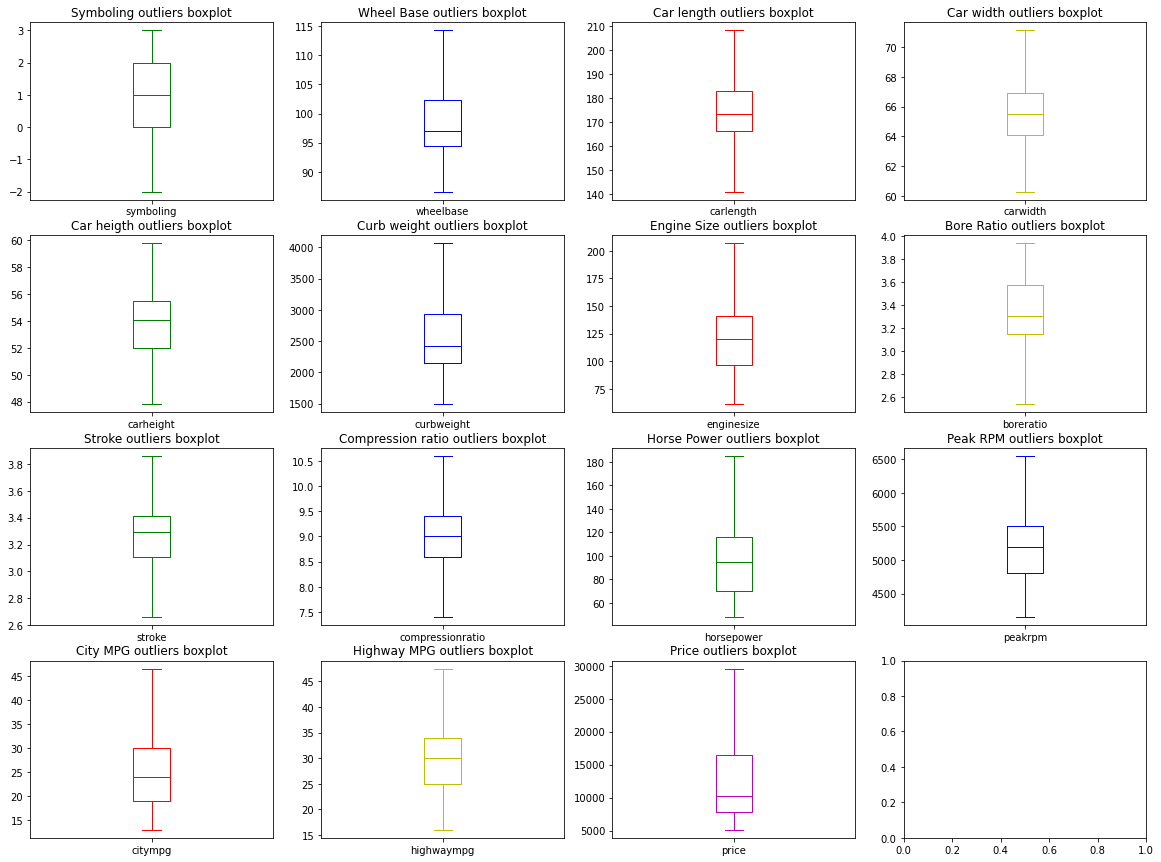

In [26]:
fig, ax = plt.subplots(nrows = 4 , ncols = 4, figsize = (20,15))

df['symboling'].plot(kind = "box" , color = "g", ax = ax[0,0])
ax[0,0].set_title("Symboling outliers boxplot")

df['wheelbase'].plot(kind = "box" , color = "b", ax = ax[0,1])
ax[0,1].set_title("Wheel Base outliers boxplot")

df['carlength'].plot(kind = "box" , color = "r", ax = ax[0,2])
ax[0,2].set_title("Car length outliers boxplot")

df['carwidth'].plot(kind = "box" , color = "y", ax = ax[0,3])
ax[0,3].set_title("Car width outliers boxplot")

df['carheight'].plot(kind = "box" , color = "g", ax = ax[1,0])
ax[1,0].set_title("Car heigth outliers boxplot")

df['curbweight'].plot(kind = "box" , color = "b", ax = ax[1,1])
ax[1,1].set_title("Curb weight outliers boxplot")

df['enginesize'].plot(kind = "box" , color = "r", ax = ax[1,2])
ax[1,2].set_title("Engine Size outliers boxplot")

df['boreratio'].plot(kind = "box" , color = "y", ax = ax[1,3])
ax[1,3].set_title("Bore Ratio outliers boxplot")

df['stroke'].plot(kind = "box" , color = "g", ax = ax[2,0])
ax[2,0].set_title("Stroke outliers boxplot")

df['compressionratio'].plot(kind = "box" , color = "b", ax = ax[2,1])
ax[2,1].set_title("Compression ratio outliers boxplot")

df['horsepower'].plot(kind = "box" , color = "g", ax = ax[2,2])
ax[2,2].set_title("Horse Power outliers boxplot")

df['peakrpm'].plot(kind = "box" , color = "b", ax = ax[2,3])
ax[2,3].set_title("Peak RPM outliers boxplot")

df['citympg'].plot(kind = "box" , color = "r", ax = ax[3,0])
ax[3,0].set_title("City MPG outliers boxplot")

df['highwaympg'].plot(kind = "box" , color = "y", ax = ax[3,1])
ax[3,1].set_title("Highway MPG outliers boxplot")

df['price'].plot(kind = "box" , color = "m", ax = ax[3,2])
ax[3,2].set_title("Price outliers boxplot")
plt.show()

### Data Visualization

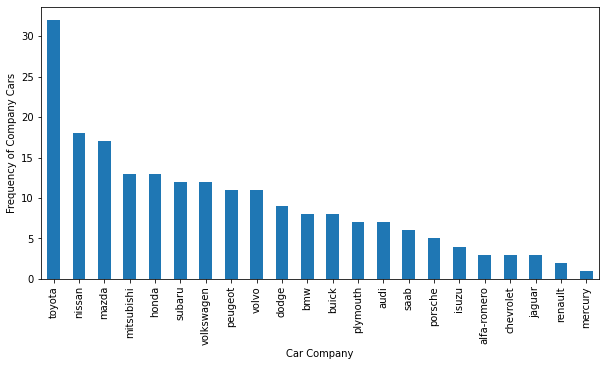

In [27]:
plt.figure(figsize = (10,5))
df.Company.value_counts().plot(kind = 'bar')
plt.xlabel("Car Company")
plt.ylabel("Frequency of Company Cars")
plt.show()

#### Toyota is the most prefered Company

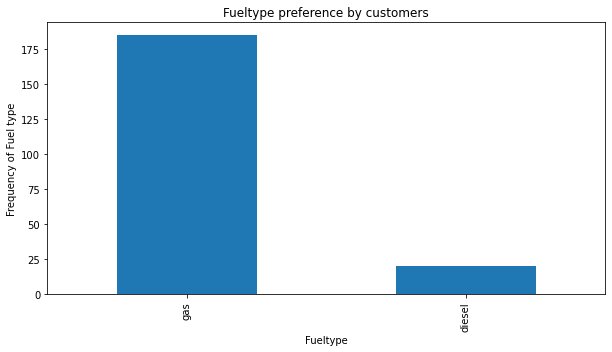

In [28]:
plt.figure(figsize = (10,5))
df.fueltype.value_counts().plot(kind = 'bar')
plt.title("Fueltype preference by customers")
plt.xlabel("Fueltype")
plt.ylabel("Frequency of Fuel type")
plt.show()

#### Gas cars are mostly prefered.

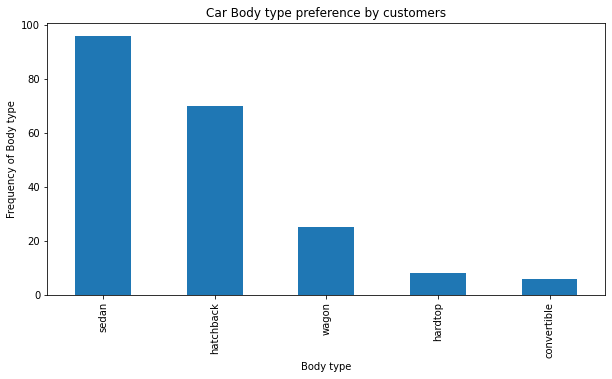

In [29]:
plt.figure(figsize = (10,5))
df.carbody.value_counts().plot(kind = 'bar')
plt.title("Car Body type preference by customers")
plt.xlabel("Body type")
plt.ylabel("Frequency of Body type")
plt.show()

#### Sedan is the most prefered Body type in cars

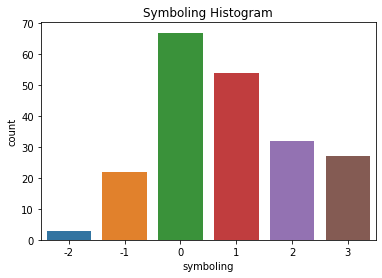

In [30]:
plt.title('Symboling Histogram')
sns.countplot(data = df, x = 'symboling')
plt.show()
# most cars are risky

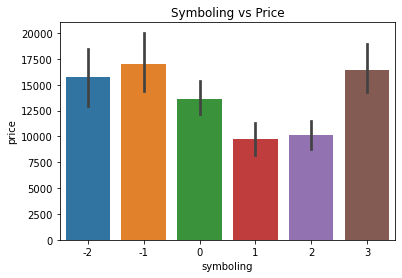

In [31]:
plt.title('Symboling vs Price')
sns.barplot(data = df, x='symboling', y='price')
plt.show()
# -1 has the highest price

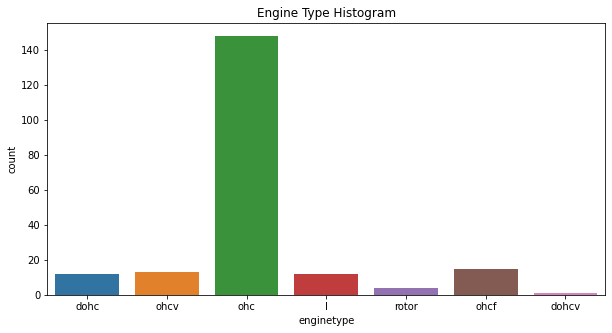

In [32]:
plt.figure(figsize = (10,5))
plt.title('Engine Type Histogram')
sns.countplot(data = df, x = 'enginetype')
plt.show()

#### OHC is the most prefered engine type

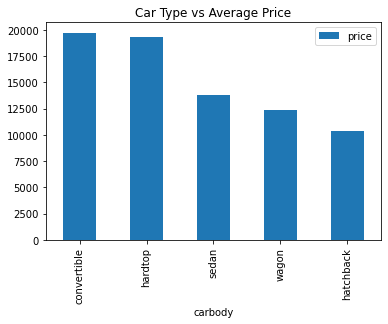

In [33]:
df1 = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Convertible and Hardtop have highest average price

<Figure size 1800x432 with 0 Axes>

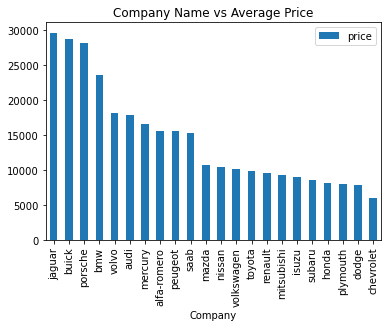

In [34]:
plt.figure(figsize=(25, 6))
df1 = pd.DataFrame(df.groupby(['Company'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

#### Jaguar has the highest average price

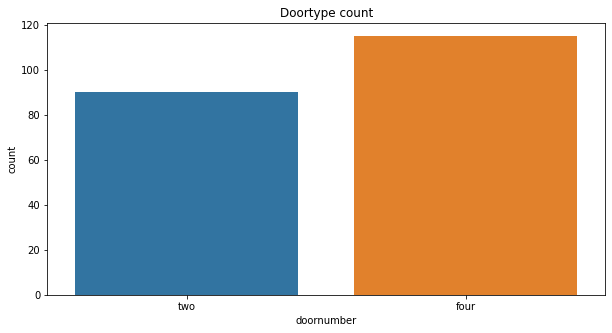

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'doornumber')
plt.title("Doortype count")
plt.show()

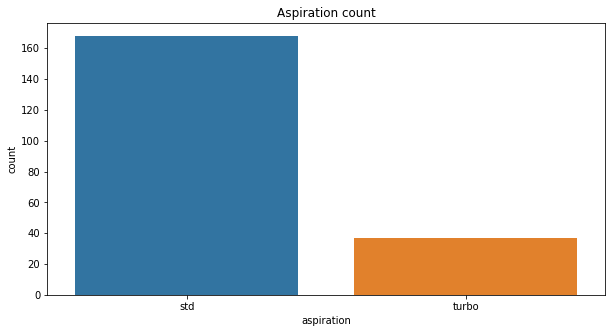

In [36]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'aspiration')
plt.title("Aspiration count")
plt.show()

### Feature selection using pearson's correlation coefficients

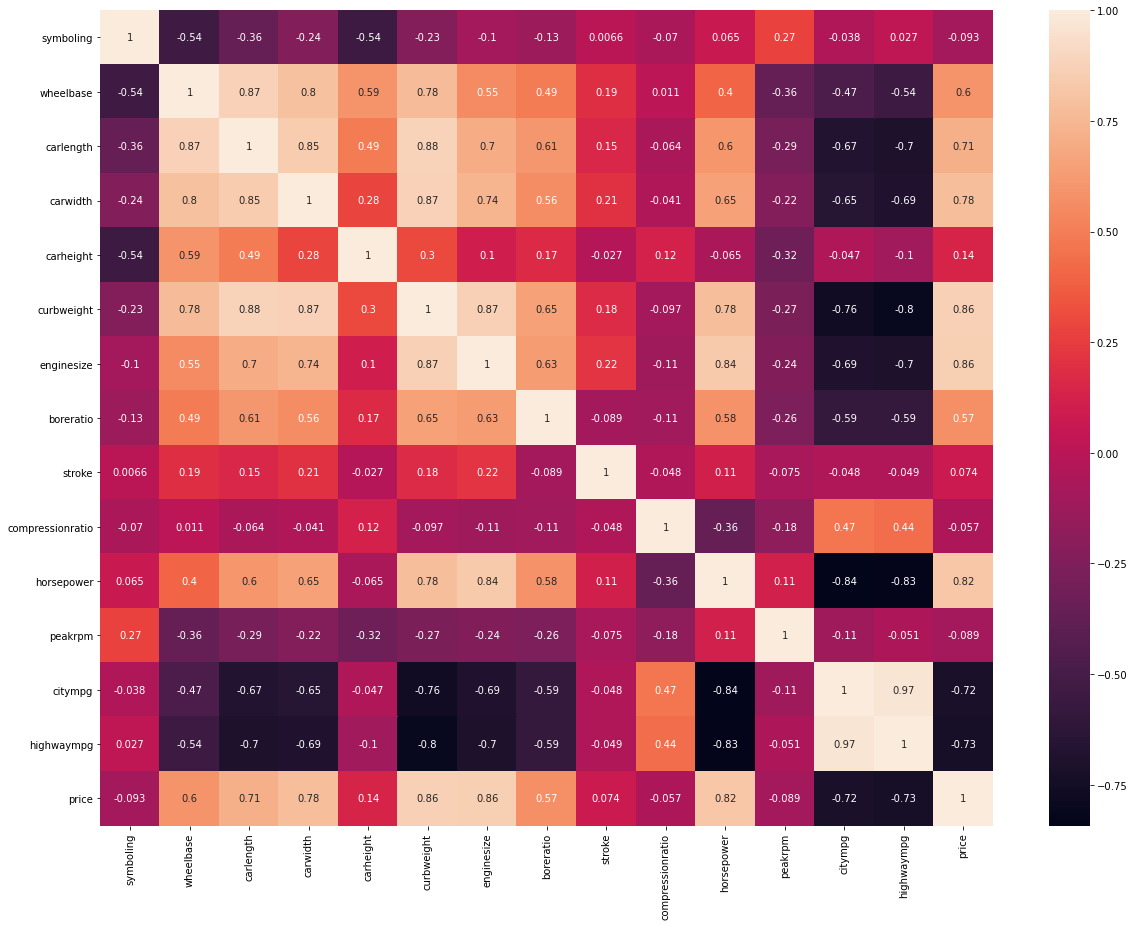

In [37]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Enginesize, curbweight, peakrpm, horsepower,highwaympg

## Model Building

### Simple linear regression

In [38]:
x = df.loc[:,["enginesize"]]
y = df["price"]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 )

In [40]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
model = lin.fit(x,y)

In [41]:
y_pred = model.predict(x_test)
prediction = pd.DataFrame({"Actual price":y_test, "Predicted Price":y_pred})
prediction.head()

,Actual price,Predicted Price
172,17669.0,16474.971162
27,8558.0,8313.436853
65,18280.0,15454.779373
115,16630.0,12054.140078
34,7129.0,7293.245065


In [42]:
slope = model.coef_
print(slope)
intercept = model.intercept_
print(intercept)

[170.03196476]
-8349.695693373074


In [43]:
model.score(x,y)

0.739707831031665

In [44]:
print(f"Linear regression Y={np.around(slope,3)}X+{np.around(intercept,2)}")

Linear regression Y=[170.032]X+-8349.7


In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = math.sqrt(mse)
print("mse =", mse)
print("mae =", mae)
print("rmse =", rmse)

mse = 7658821.429969949
mae = 2122.0354177618965
rmse = 2767.457575098478


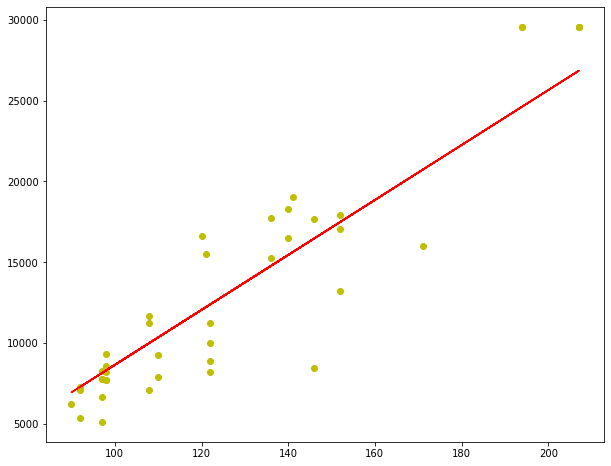

In [46]:
plt.figure(figsize = (10,8))
plt.scatter(x_test['enginesize'],y_test,c = 'y')
plt.plot(x_test['enginesize'],prediction['Predicted Price'], c = 'r')
plt.show()

In [47]:
print("R squared score", model.score(x_test,y_test))

R squared score 0.8559346079551091


In [48]:
#print("R squared score", model.score(x_test,y_pred))

### Multilinear regression

In [49]:
x = df.loc[:,["enginesize","curbweight","horsepower",'peakrpm','highwaympg']]
y = df["price"]

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 )

In [51]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
model = lin.fit(x,y)
model

LinearRegression()

In [52]:
y_pred = model.predict(x_test)
prediction = pd.DataFrame({"Actual price":y_test,"Predicted Price":y_pred})
prediction.head()

,Actual price,Predicted Price
21,5572.0,6207.875060
66,18344.0,12588.324688
88,9279.0,11894.345307
150,5348.0,5541.886462
22,6377.0,5909.346998


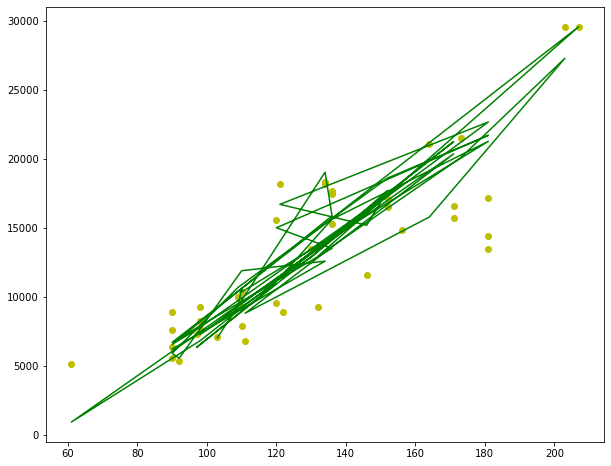

In [53]:
plt.figure(figsize = (10,8))
plt.scatter(x_test['enginesize'],y_test,c = 'y')
plt.plot(x_test['enginesize'],prediction['Predicted Price'], c = 'g')
plt.show()

In [54]:
y_pred.shape

(41,)

In [55]:
x['enginesize'].shape

(205,)

In [56]:
x['enginesize'].shape

(205,)

In [57]:
print('Mean Squared Error is:', mean_squared_error(y_test, y_pred))

Mean Squared Error is: 9229909.351964053


In [58]:
print('Root Mean Squared Error is:', np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error is: 3038.076587573798


In [59]:
model.coef_

array([62.53378082,  6.99025517, 38.46943858,  1.60451233, 99.50935395])

In [60]:
r2 = model.score(x,y)
print(r2*100)

82.53108148826165


In [61]:
# Adjusted R^2 Score
adj = 1-((1-r2)*((len(x)-1)/(((len(x)-1)-len(x.columns)-1)-1)))
adj

0.8191035849545876

#### Engine size is the main feature which affects the prices of Car